# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics

# Setting plot style for better visulas

In [2]:
sns.set(style='whitegrid')

# Loading the data:

In [3]:
df = pd.read_excel("C:/Users/Neelanjan Dutta/Music/Fun/Folds5x2_pp.xlsx")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Exploratory Data Analysis:

In [4]:
#Dataset information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
#Descriptive statistics:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000



Generating data distribution plots...


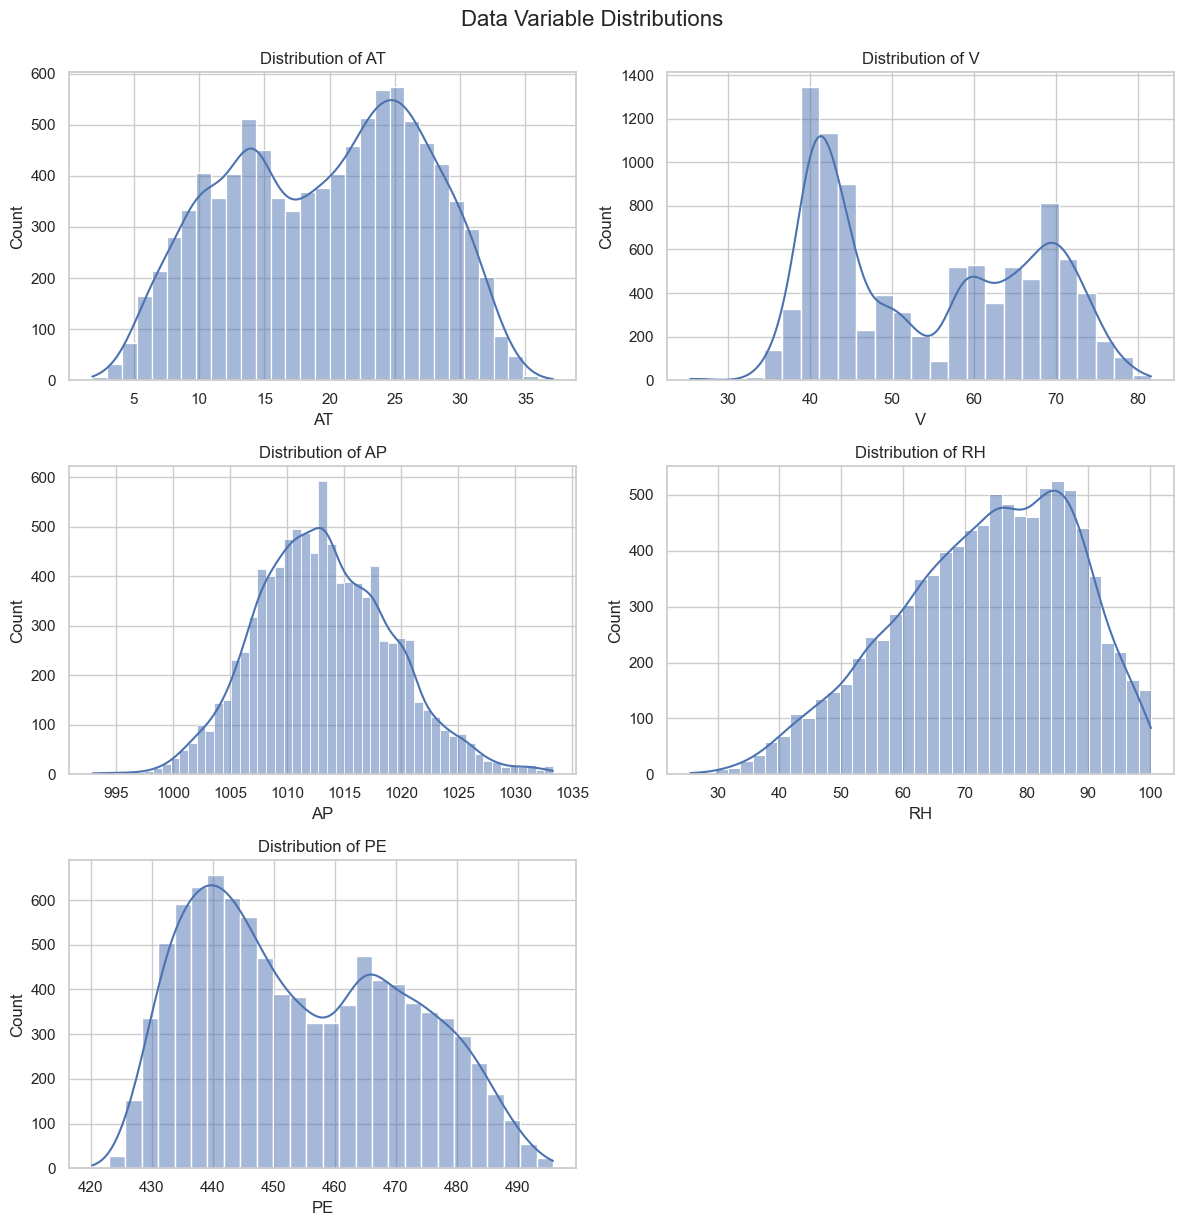

In [6]:
#Visualizing data distributions:
print("\nGenerating data distribution plots...")
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel() # Flatten the 2D array of axes

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    
fig.delaxes(axes[5]) # Remove the empty subplot
plt.tight_layout()
plt.suptitle("Data Variable Distributions", y=1.02, fontsize=16)
plt.show()

Generating correlation matrix heatmap...


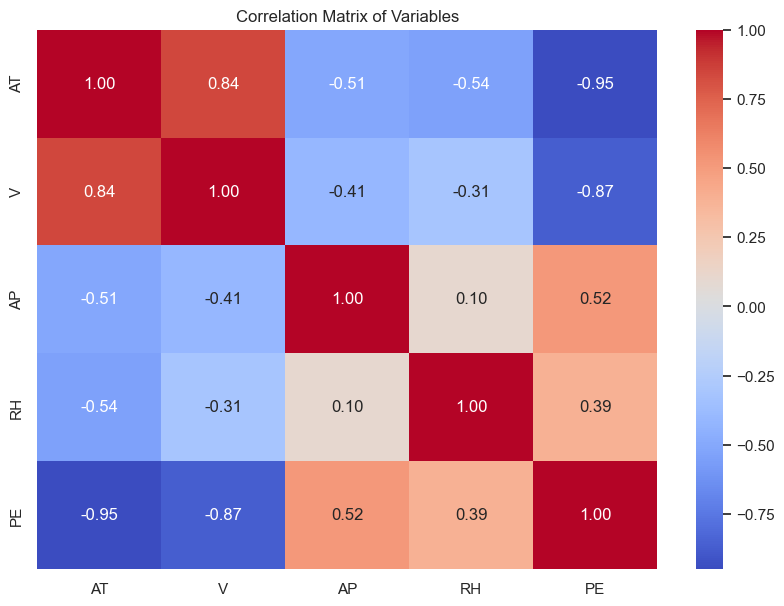

In [7]:
#Correlation Analysis:
print("Generating correlation matrix heatmap...")
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Variables')
plt.show()

Generating pairplot for a deeper look at variable relationships...


C:\Users\Neelanjan Dutta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


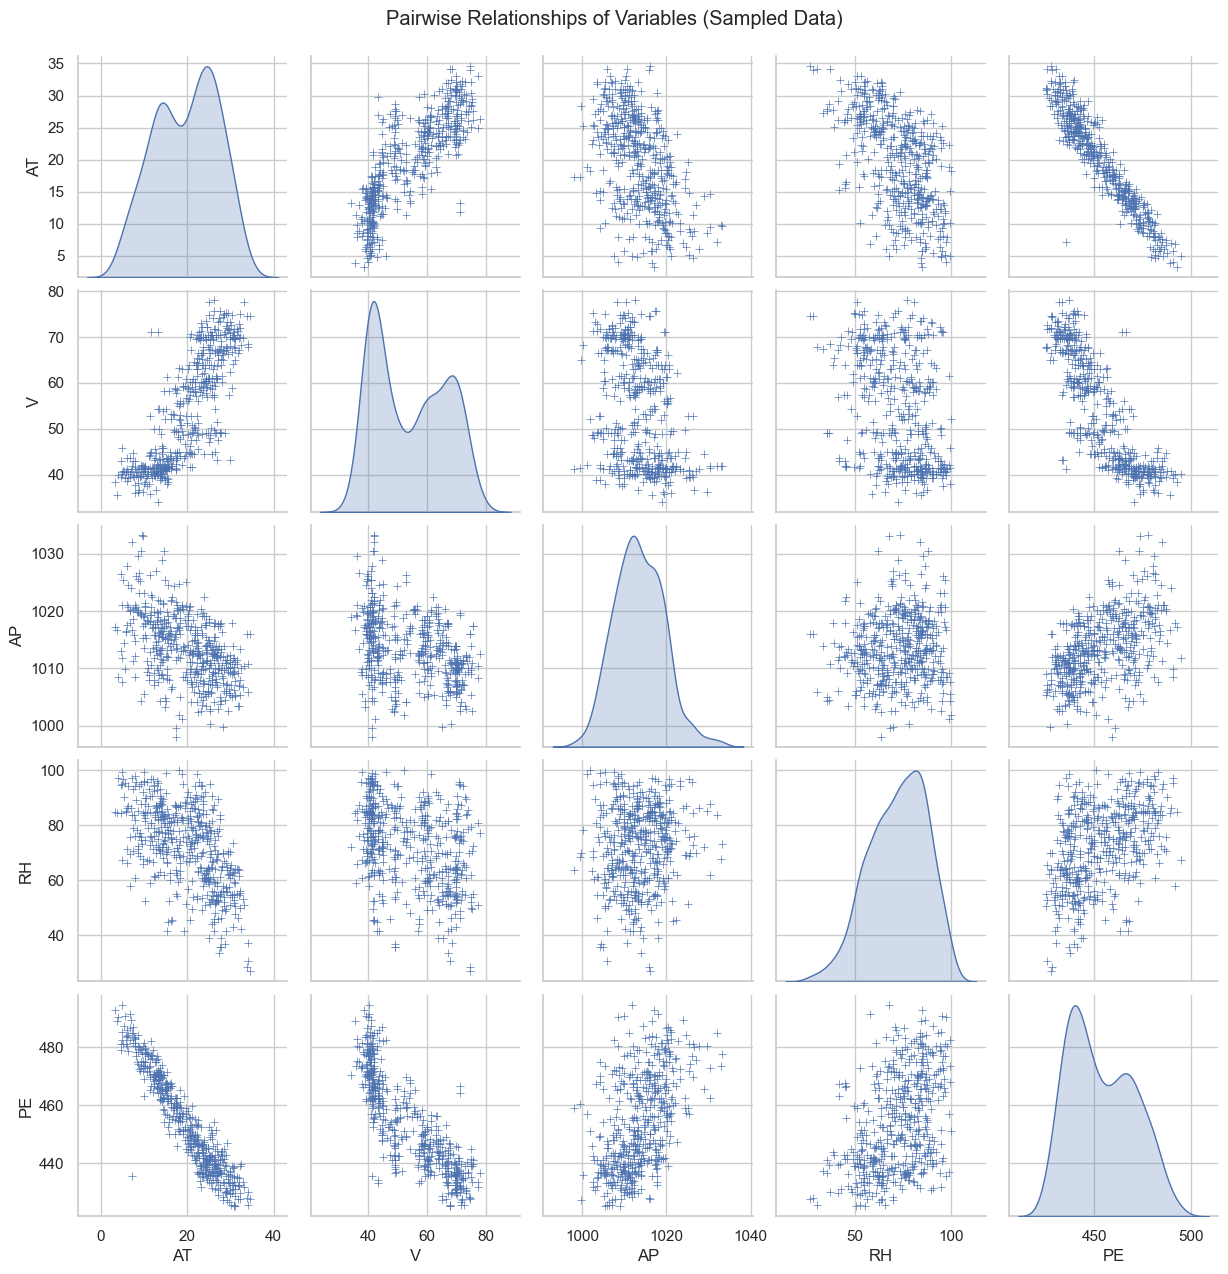

In [8]:
#Pairplot visualization:
print("Generating pairplot for a deeper look at variable relationships...")
sns.pairplot(df.sample(500), diag_kind='kde', markers='+')
plt.suptitle("Pairwise Relationships of Variables (Sampled Data)", y=1.02)
plt.show()

# Data Preprocessing:

In [10]:
# Splitting the data into features (X) and target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print("Data split into features (X) and target (y).\nX:", X, "\ny:", y)

Data split into features (X) and target (y).
X: [[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]] 
y: [463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [11]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dataset split into training ({len(X_train)} samples) and testing ({len(X_test)} samples) sets.")

Dataset split into training (7654 samples) and testing (1914 samples) sets.


In [12]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training and Evaluation

In [25]:
# Store predictions in a dictionary for easy access later
predictions = {}
feature_names = df.columns[:-1]

## Model 1: Linear Regression 

In [26]:
print("Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
predictions['Linear Regression'] = lr_model.predict(X_test_scaled)
print("Linear Regression model trained.")

Training Linear Regression model...
Linear Regression model trained.


## Model 2: Random Forest Regressor 

In [27]:
print("Training Random Forest Regressor model...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
predictions['Random Forest'] = rf_model.predict(X_test_scaled)
print("Random Forest model trained.")

Training Random Forest Regressor model...
Random Forest model trained.


## Model 3: XGBoost Regressor 

In [28]:
print("Training XGBoost Regressor model...")
xgb_model = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train)
predictions['XGBoost'] = xgb_model.predict(X_test_scaled)
print("XGBoost model trained.")

Training XGBoost Regressor model...
XGBoost model trained.


## Model 4: Artificial Neural Network (ANN) 

In [29]:
print("Training Artificial Neural Network (ANN) model...")
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=(X_train_scaled.shape[1],)))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = ann.fit(X_train_scaled, y_train,
                  batch_size=32,
                  epochs=100,
                  verbose=0,
                  validation_split=0.1,
                  callbacks=[early_stopping])

predictions['ANN'] = ann.predict(X_test_scaled).flatten()
print("ANN model trained (with Early Stopping).")

Training Artificial Neural Network (ANN) model...
60/60 [==============================] - 0s 2ms/step
ANN model trained (with Early Stopping).


# Hyperparameter Tuning for Best Model

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
# Define the parameter grid for Randomized Search
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Use RandomizedSearchCV to find the best parameters
random_search = RandomizedSearchCV(estimator=XGBRegressor(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=50,  # Number of parameter settings that are sampled
                                   cv=5,
                                   verbose=0,
                                   random_state=42,
                                   n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

print(f"Best parameters found: {random_search.best_params_}")

Best parameters found: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.9}


In [37]:
# Train a new XGBoost model with the best parameters
tuned_xgb_model = random_search.best_estimator_
predictions['Tuned XGBoost'] = tuned_xgb_model.predict(X_test_scaled)
print("Tuned XGBoost model trained and evaluated.")

Tuned XGBoost model trained and evaluated.


# Model Comparison

In [38]:
def evaluate_model(y_true, y_pred):
    r2 = metrics.r2_score(y_true, y_pred)
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return {'R-squared': r2, 'MAE': mae, 'MSE': mse, 'RMSE': rmse}

results = {model_name: evaluate_model(y_test, pred) for model_name, pred in predictions.items()}

results_df = pd.DataFrame(results).T.sort_values(by='R-squared', ascending=False)
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
                   R-squared       MAE        MSE      RMSE
Tuned XGBoost       0.969991  2.095858   8.704331  2.950310
XGBoost             0.968641  2.187619   9.096017  3.015960
Random Forest       0.963675  2.329829  10.536352  3.245975
ANN                 0.930904  3.556068  20.041855  4.476813
Linear Regression   0.930105  3.595913  20.273706  4.502633


In [39]:
# Show a sample of predictions
print("\n--- Comparing Actual vs. Predicted Values (First 10 Test Samples) ---")
comparison_df = pd.DataFrame({'Actual': y_test}).join(
    [pd.DataFrame({name: pred}) for name, pred in predictions.items()]
)
print(comparison_df.head(10).round(2))


--- Comparing Actual vs. Predicted Values (First 10 Test Samples) ---
   Actual  Linear Regression  Random Forest     XGBoost         ANN  \
0  455.27             455.68         455.75  454.250000  455.600006   
1  436.31             438.73         435.90  435.359985  437.899994   
2  440.68             434.16         434.75  438.250000  433.410004   
3  434.40             438.77         435.32  434.779999  437.920013   
4  482.06             479.89         479.08  479.079987  480.179993   
5  436.07             439.50         435.88  435.450012  438.799988   
6  452.48             448.84         451.26  452.170013  448.480011   
7  435.22             434.81         435.12  433.690002  433.950012   
8  432.93             435.10         435.02  436.470001  434.220001   
9  466.46             472.95         468.31  466.890015  473.309998   

   Tuned XGBoost  
0     453.369995  
1     435.450012  
2     437.390015  
3     435.399994  
4     478.140015  
5     434.670013  
6     452.3399

# Visualizing Model Performance & Insights

Generating ANN training loss curve...


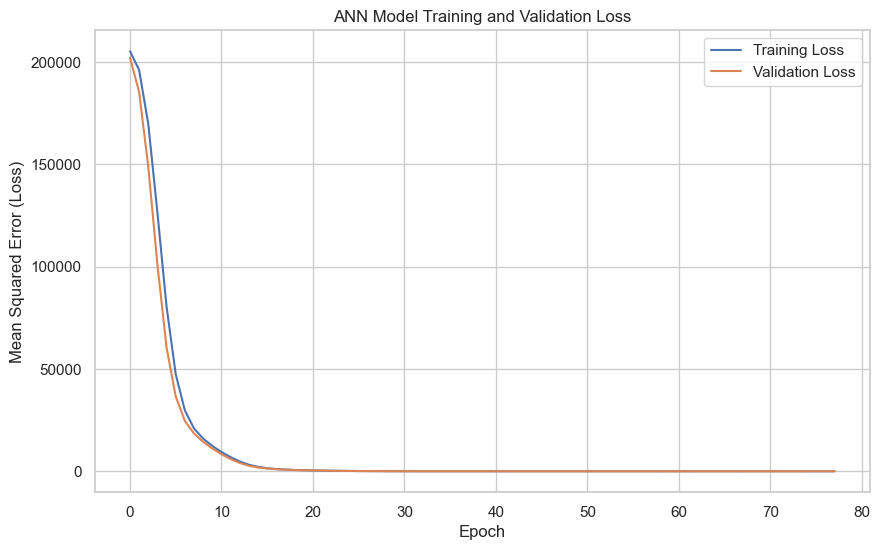

In [40]:
# ANN Training Loss Curve
print("Generating ANN training loss curve...")
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.grid(True)
plt.show()

Generating feature importance plots...


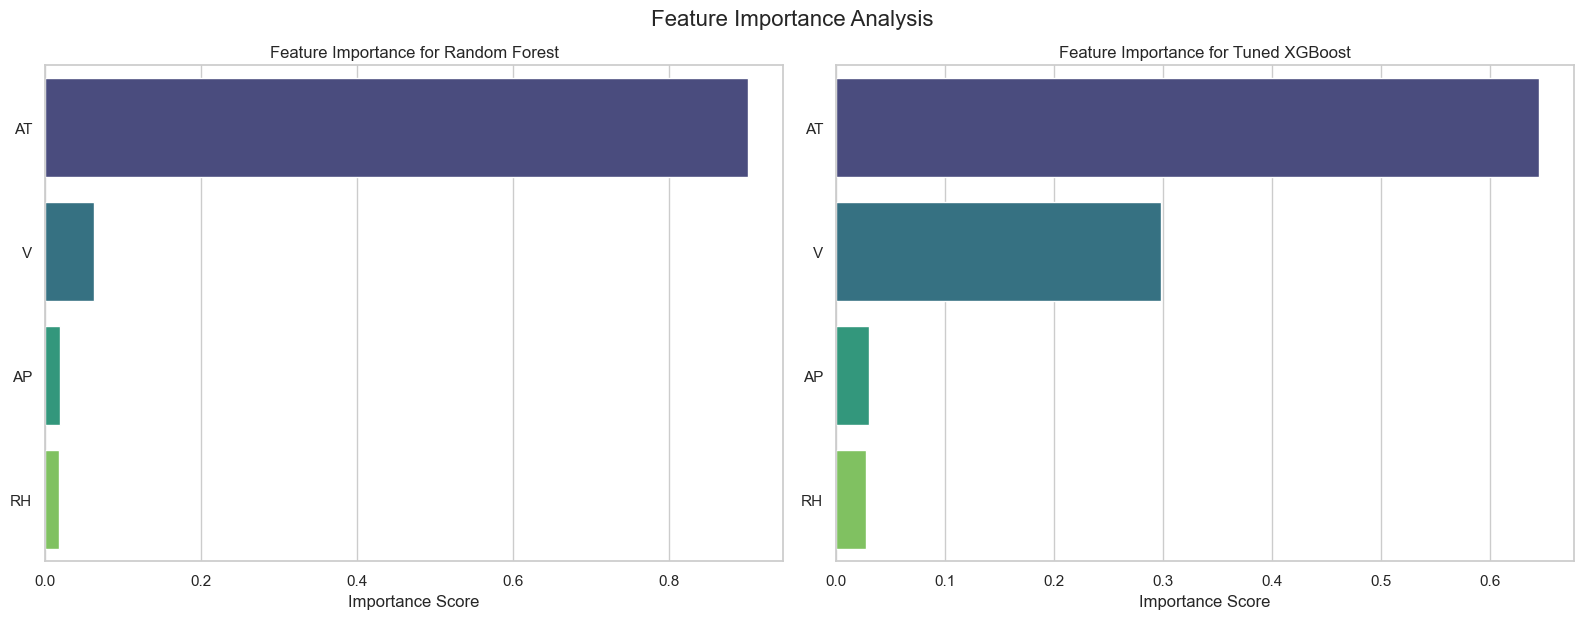

In [41]:
# Feature Importance Analysis
print("Generating feature importance plots...")
importances = {
    'Random Forest': rf_model.feature_importances_,
    'Tuned XGBoost': tuned_xgb_model.feature_importances_
}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
for i, (model_name, importance_values) in enumerate(importances.items()):
    sns.barplot(x=importance_values, y=feature_names, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Feature Importance for {model_name}')
    axes[i].set_xlabel('Importance Score')
plt.tight_layout()
plt.suptitle('Feature Importance Analysis', y=1.03, fontsize=16)
plt.show()

Generating actual vs. predicted values plots for all models...


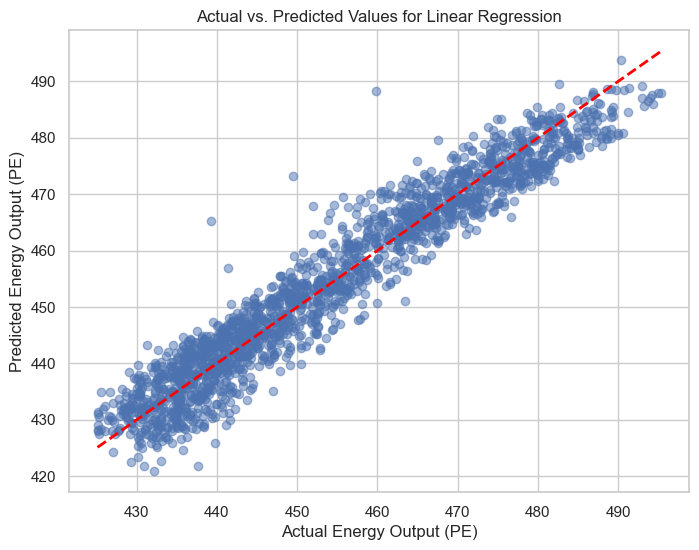

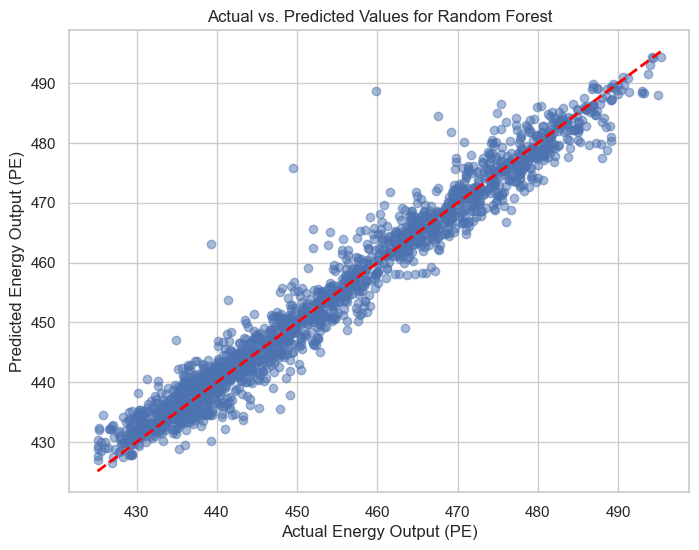

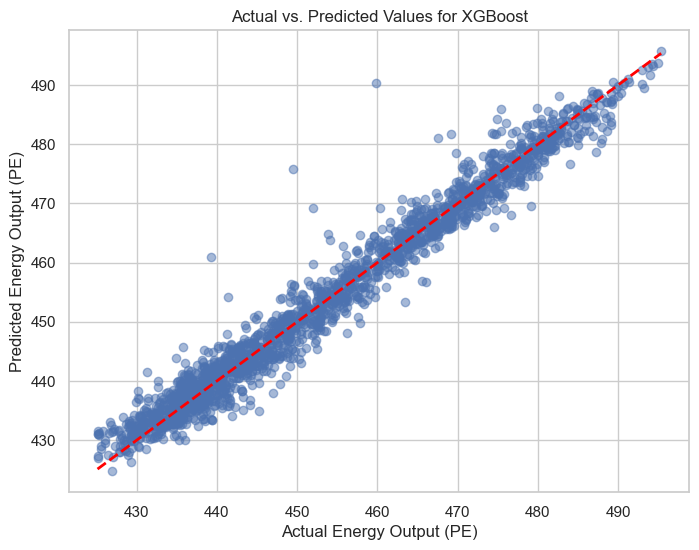

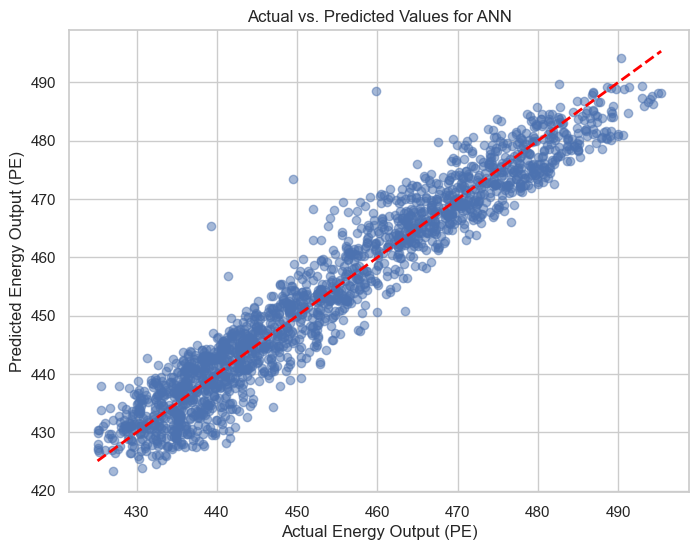

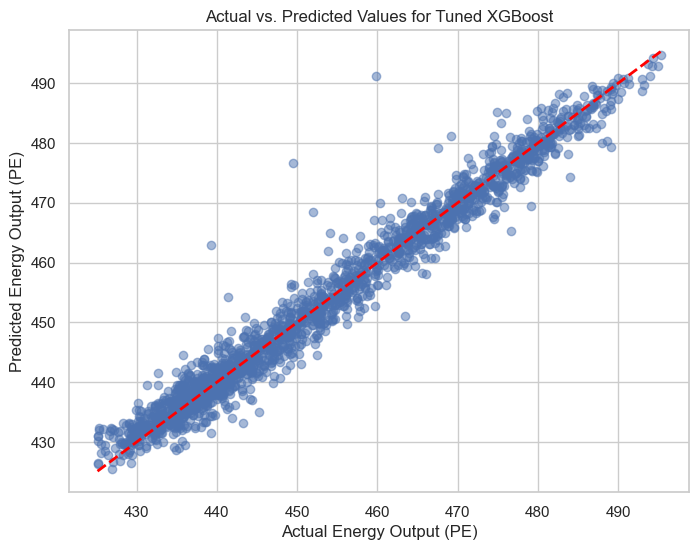

In [42]:
# Individual Prediction Plots
print("Generating actual vs. predicted values plots for all models...")
for model_name, y_pred in predictions.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', lw=2)
    plt.title(f'Actual vs. Predicted Values for {model_name}')
    plt.xlabel('Actual Energy Output (PE)')
    plt.ylabel('Predicted Energy Output (PE)')
    plt.grid(True)
    plt.show()

# Final Model Validation

Highlighting the best model based on R-squared: Tuned XGBoost
Generating plot for the best model (Tuned XGBoost)...


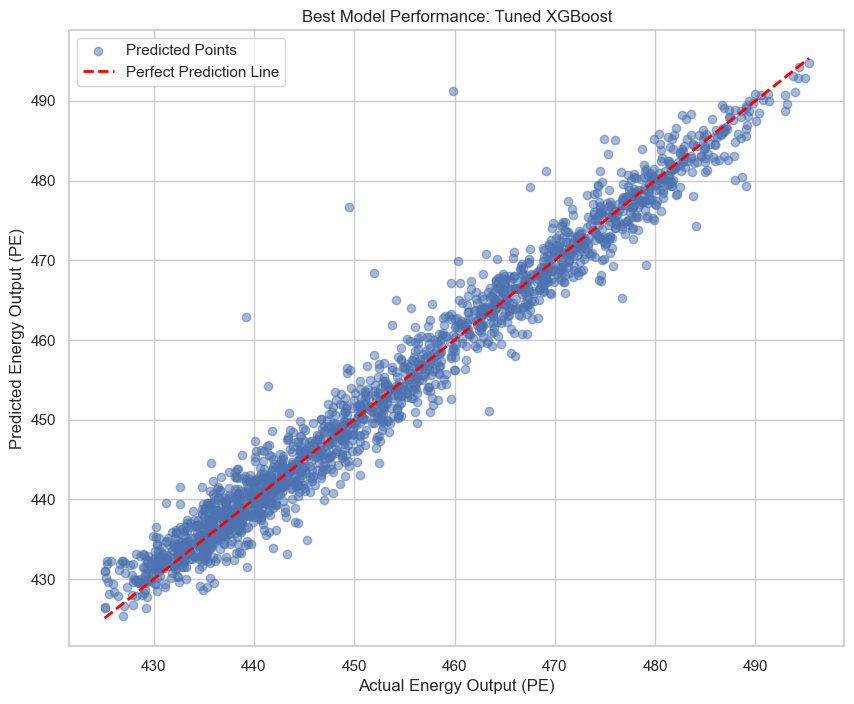

In [43]:
best_model_name = results_df.index[0]
best_model_predictions = predictions[best_model_name]
print(f"Highlighting the best model based on R-squared: {best_model_name}")

# Visualizing Predictions of the Best Model
print(f"Generating plot for the best model ({best_model_name})...")
plt.figure(figsize=(10, 8))
plt.scatter(y_test, best_model_predictions, alpha=0.5, label='Predicted Points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Energy Output (PE)')
plt.ylabel('Predicted Energy Output (PE)')
plt.title(f'Best Model Performance: {best_model_name}')
plt.legend()
plt.grid(True)
plt.show()

Generating residual plot for the best model (Tuned XGBoost)...


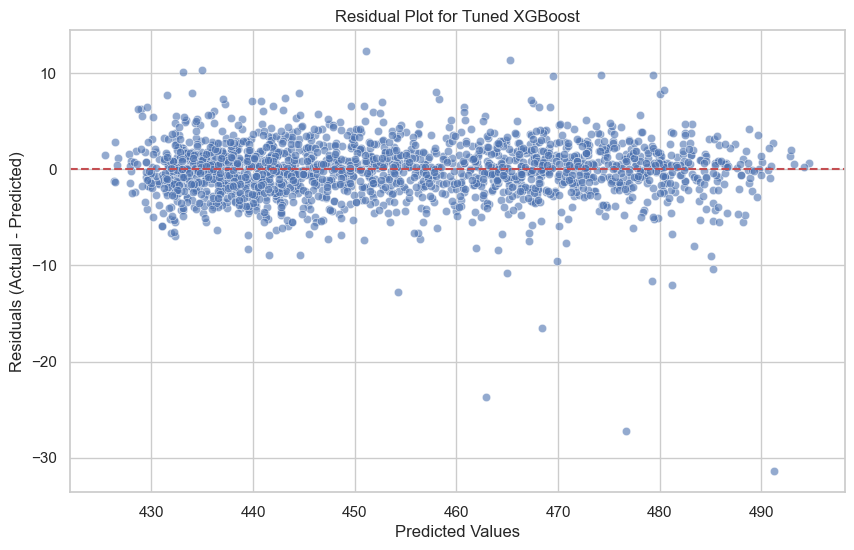

In [44]:
# Residual Analysis for the Best Model
print(f"Generating residual plot for the best model ({best_model_name})...")
residuals = y_test - best_model_predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=best_model_predictions, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title(f'Residual Plot for {best_model_name}')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

In [46]:
import joblib
print("\n--- 8. Saving Final Model and Scaler ---")

joblib.dump(tuned_xgb_model, 'best_power_plant_model.joblib')
print(f"Best model ('{best_model_name}') saved to best_power_plant_model.joblib")

joblib.dump(scaler, 'scaler.joblib')
print("Scaler object saved to scaler.joblib")


--- 8. Saving Final Model and Scaler ---
Best model ('Tuned XGBoost') saved to best_power_plant_model.joblib
Scaler object saved to scaler.joblib
